# Overview

The multi-armed bandit problem is a dilemma where we have 3 slot machines, each with their own win rate. How should we play to maximise our returns? ie. how do we find out which slot machine is best? 

We need to find a way of balancing our exploration (collection of data, costly) with our exploitation (playing the machine we currently think is the best). Too much exploration is costly and too little exploration may lead to the wrong conclusion.

One approach could predetermine an immutable number of games to play as exploration to establish statistical significance (A/B testing). However, often the \[minimum\] number of games needed depends on things such as win rates, which obvs we don't know. This is a disadvantage. We will not be caring about statistical significance in this course, and instead look for better ways, balancing the exploration/exploitation trade-off.

# Epsilon-Greedy

The simplest way of balance is using the Epsilon-Greedy algorithm for some small epsilon (say, 0.05 or 0.1). It's summarised as follows:

In [ ]:
p = random()

if p < eps:
    pull(random_arm)
else:
    pull(current_arm)

This will eventually converge to finding/pulling the best arm most of the time. Obvs not the best as it will always pull a random arm sometimes, so it'd be cool to find a method that addresses this. We could combine this with an A/B test, but there are better ways...

# Updating a Sample Mean

When dealing with dynamic means we can simply calculate the mean using $\overline{X} = \dfrac{1}{N} \sum_i=1^N X_i$ every piece of data we collect. However, this involves summing over all $X_i$ every step. There's a much more efficient way to deal with dynamic means.

Indeed:
$$\overline{X}_N = \dfrac{1}{N} \sum_{i=1}^N X_i = \dfrac{1}{N} \sum_{i=1}^{N-1} X_i + \dfrac{1}{N} X_{N} = \dfrac{N-1}{N} \overline{X}_{N-1} + \dfrac{1}{N} X_{N},$$
thus
$$\overline{X}_N = \left( 1 - \dfrac{1}{N} \right) \overline{X}_{N-1} \dfrac{1}{N} X_{N}.$$

Very cool! Much important!

# Comparing Different Epsilons

0.9707959251370034
2.0294677346738674
2.9989070739204124
0.9911676194230237
2.0174628725516457
2.9985634846604103
0.9312197555852935
2.0159798320465594
2.999396863149165


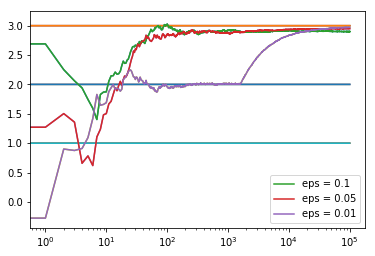

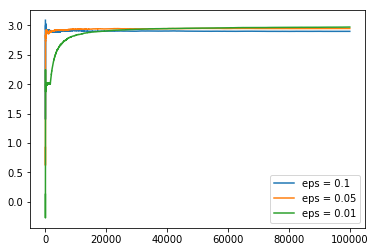

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


class Bandit:
    def __init__(self,m):
        self.m = m
        self.mean = 0
        self.N = 0
        self.last_pull = 0

    def pull(self):
        self.last_pull = np.random.randn() + self.m
        self.N += 1
        self.mean = (1 - (1 / self.N) ) * self.mean + 1 / (self.N) * self.last_pull
        return self.last_pull

    # def update(self,x):
    #     self.N += 1
    #     self.mean = (1 - (1 / self.N) ) * self.mean + 1 / (self.N) * x

def run(m1, m2, m3, eps, N):
    bandits = [Bandit(m1),Bandit(m2),Bandit(m3)]
    data = []

    for x in range(N):
        #eps-greedy
        if np.random.random() < eps:
            data.append(bandits[np.random.randint(0,3)].pull())
        else:
            data.append(bandits[np.argmax([b.mean for b in bandits])].pull())


    cum_avg = np.cumsum(data) / (np.arange(N) + 1)

    plt.plot(cum_avg)
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)

    for b in bandits:
        print(b.mean)

    return cum_avg

if __name__ == '__main__':
    c_1 = run(1.0,2.0,3.0,0.1,100000)
    c_05 = run(1.0, 2.0, 3.0, 0.05, 100000)
    c_01 = run(1.0, 2.0, 3.0, 0.01, 100000)

    # log scale plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.xscale('log')
    plt.show()

    # linear plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.show()